In [ ]:
#드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import time
import os

os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
data3 = pd.read_csv("/content/drive/MyDrive/교내공모전/교내통계경진대회_데이터셋 - 2022년 출근 (하선,외선).csv")
data3

,호선명,지하철역,위도,경도,상세주소,총층수,출근_하외선_배차간격,승차인원_0708,승차인원_0809,승차인원_0910,하차인원_0708,하차인원_0809,하차인원_0910,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",열차내 사고,역구내 사고,출입문관련,승강설비관련,발빠짐,기타,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(하선,외선)",출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW
0,2,강남,37.497175,127.027926,서울서초구서초동1374,3,4.253968,36176,60473,49096,138873,293325,300163,831737,3,1,0,3,1,0,0,5,5,0,1,6,1,4,86.085714,10361,4710,9107,24991,2311,88696,5548,4832,7179,10609,3252,10650,56430,3076,325838,5635,1869,7809
1,2,강변,37.535095,127.094681,서울광진구구의동546-6,2,4.336134,73477,107711,77201,24293,44236,37692,315530,3,0,0,1,1,0,0,2,9,0,0,7,0,5,31.185714,5982,2482,3188,31376,2316,122460,3358,1803,3298,5666,4870,3286,26163,2205,88296,2151,2753,2462
2,2,건대입구,37.540693,127.070230,서울광진구화양동6-4,5,4.387500,49601,88230,59238,24521,59571,49529,374321,3,5,0,3,2,0,0,10,11,1,2,2,2,6,45.100000,7219,5918,5182,29428,2599,130241,1890,3677,2820,8496,4361,3405,52120,2705,98437,3539,2361,2936
3,2,교대,37.493415,127.014080,서울서초구서초동1672-9,3,4.239837,24068,34642,28511,52910,146658,134416,367316,2,3,0,2,1,2,0,8,6,0,2,4,2,2,103.685714,7436,3619,5763,29890,2654,95422,4083,3046,5008,7607,3959,6571,38890,2009,186677,4045,1936,4732
4,2,구로디지털단지,37.485266,126.901401,서울구로구구로동810-3,3,4.296748,127585,174194,106382,79227,234611,136484,731249,3,1,0,2,0,4,0,7,10,1,0,8,0,6,55.957143,6598,3424,4953,24096,1788,95008,3212,2718,2629,7243,3245,10008,42617,2646,416612,3425,1962,5980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,8,송파,37.499703,127.112183,서울송파구가락동459-4,2,7.020408,25174,30969,17856,9419,16947,9960,145566,2,1,0,0,0,0,0,1,10,1,0,3,0,4,83.600000,9665,6101,11644,29754,3020,110184,3088,2696,5248,6246,3456,2630,26233,2126,58383,3221,2245,3038
238,8,암사,37.550210,127.127562,서울강동구암사동501,2,7.040816,76206,99845,48910,9066,19159,13284,303952,2,0,0,0,0,0,0,0,8,1,0,7,0,2,33.128571,3113,3017,1437,15954,835,55090,1065,697,1393,2801,2174,1329,13869,1187,27378,1208,1541,1119
239,8,잠실,37.513950,127.102234,서울송파구신천동8,3,7.010204,8366,12291,9101,28878,72523,41636,226010,2,0,0,0,0,0,0,0,6,1,0,6,0,8,77.614286,6598,5279,5786,19553,1503,66961,2922,4182,3895,10321,2789,7568,64675,2496,291016,4404,1419,6138
240,8,장지,37.478703,127.126191,서울송파구장지동217-3,2,7.000000,43484,53790,30101,26555,46093,29246,295459,2,0,0,0,1,0,0,1,6,2,0,9,0,12,38.485714,10555,5531,8209,22715,3054,101045,8794,4938,9195,9839,3487,11040,50901,2752,338478,5017,2166,7425


# 하선 외선 출근 노선: 2,3,4,7

In [ ]:
data3 = data3[data3['호선명'].isin([2, 3, 4, 7])]
len(data3)

144

In [ ]:
columns_to_remove = ['열차내 사고', '역구내 사고', '출입문관련', '승강설비관련', '발빠짐', '기타']
data3 = data3.drop(columns=columns_to_remove)
data3[data3.isnull().any(axis=1)]

,호선명,지하철역,위도,경도,상세주소,총층수,출근_하외선_배차간격,승차인원_0708,승차인원_0809,승차인원_0910,하차인원_0708,하차인원_0809,하차인원_0910,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(하선,외선)",출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW


# OLS 학습 후 다중공선성 확인

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1 = data3.copy()

In [ ]:
columns_to_remove = ['호선명', '지하철역', '위도', '경도', '상세주소']
df1 = df1.drop(columns=columns_to_remove)

In [ ]:
import re

def modify_column_names(df):
    new_columns = []
    for column in df.columns:
        modified_name = re.sub(r'\([^)]*\)', '', column)
        modified_name = modified_name.replace('-', '_')
        modified_name = modified_name.replace(' ', '_')
        new_columns.append(modified_name)

    return new_columns

df1.columns = modify_column_names(df1)
df1

,총층수,출근_하외선_배차간격,승차인원_0708,승차인원_0809,승차인원_0910,하차인원_0708,하차인원_0809,하차인원_0910,환승유입인원수,안전시설지수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학_수,반경_아파트_수,반경_내_대학교_수,공공_자전거_시설_수,출근시간_혼잡도_평균,출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW
0,3,4.253968,36176,60473,49096,138873,293325,300163,831737,3,5,5,0,1,6,1,4,86.085714,10361,4710,9107,24991,2311,88696,5548,4832,7179,10609,3252,10650,56430,3076,325838,5635,1869,7809
1,2,4.336134,73477,107711,77201,24293,44236,37692,315530,3,2,9,0,0,7,0,5,31.185714,5982,2482,3188,31376,2316,122460,3358,1803,3298,5666,4870,3286,26163,2205,88296,2151,2753,2462
2,5,4.387500,49601,88230,59238,24521,59571,49529,374321,3,10,11,1,2,2,2,6,45.100000,7219,5918,5182,29428,2599,130241,1890,3677,2820,8496,4361,3405,52120,2705,98437,3539,2361,2936
3,3,4.239837,24068,34642,28511,52910,146658,134416,367316,2,8,6,0,2,4,2,2,103.685714,7436,3619,5763,29890,2654,95422,4083,3046,5008,7607,3959,6571,38890,2009,186677,4045,1936,4732
4,3,4.296748,127585,174194,106382,79227,234611,136484,731249,3,7,10,1,0,8,0,6,55.957143,6598,3424,4953,24096,1788,95008,3212,2718,2629,7243,3245,10008,42617,2646,416612,3425,1962,5980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2,4.942029,49584,56691,30165,8510,14297,8090,147598,3,2,8,2,1,5,1,5,20.957143,5395,2215,4476,41350,1118,177399,3477,1681,3573,3635,3364,2572,18426,1316,45777,1778,3482,1527
227,4,4.631579,10121,13956,12092,56021,144360,95665,244815,2,2,8,2,0,10,0,6,87.371429,9342,4789,8591,14222,1325,44536,4729,4209,5446,17098,2616,13111,81903,1431,417692,7768,1178,8045
228,4,4.592105,21160,25902,17208,7942,17922,12770,95405,3,0,8,1,2,11,2,7,68.942857,7266,5213,3963,42997,2288,153883,3391,2755,3132,6531,4978,3013,36556,2178,72852,2861,4220,2697
229,3,4.592105,65969,68384,37897,14751,24644,19419,246439,3,4,20,1,2,10,2,7,65.414286,2298,1434,837,18891,1304,67804,828,766,1110,1581,2225,602,7177,906,13528,552,1456,572


In [ ]:
text_join1 = ' + '.join(df1.columns)
text_join1

'총층수 + 출근_하외선_배차간격 + 승차인원_0708 + 승차인원_0809 + 승차인원_0910 + 하차인원_0708 + 하차인원_0809 + 하차인원_0910 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근시간_혼잡도_평균 + 출근출발_EE + 출근출발_EH + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근출발_WH + 출근출발_WW + 출근도착_EE + 출근도착_EH + 출근도착_EW + 출근도착_HE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WH + 출근도착_WW'

In [ ]:
print(df1.columns)

Index(['총층수', '출근_하외선_배차간격', '승차인원_0708', '승차인원_0809', '승차인원_0910',
       '하차인원_0708', '하차인원_0809', '하차인원_0910', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근시간_혼잡도_평균', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW'],
      dtype='object')


In [ ]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)

sdf = df1.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['총층수', '출근_하외선_배차간격', '승차인원_0708', '승차인원_0809', '승차인원_0910',
       '하차인원_0708', '하차인원_0809', '하차인원_0910', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW']]
corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬

## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다.
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('출근시간_혼잡도_평균 ~총층수 + 출근_하외선_배차간격 + 승차인원_0708 + 승차인원_0809 + 승차인원_0910 + 하차인원_0708 + 하차인원_0809 + 하차인원_0910 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근출발_EE + 출근출발_EH + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근출발_WH + 출근출발_WW + 출근도착_EE + 출근도착_EH + 출근도착_EW + 출근도착_HE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WH + 출근도착_WW',data=sdf).fit()

variables = [] ## 변수 이름
reg_coef = [] ## 해당 변수의 회귀 계수
vif = [] ## 해당 변수의 분산팽창인자
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])

df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1.850
Date:                Sat, 11 Nov 2023   Prob (F-statistic):            0.00902
Time:                        06:36:46   Log-Likelihood:                 186.30
No. Observations:                 144   AIC:                            -302.6
Df Residuals:                     109   BIC:                            -198.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.541e-18      0.006    1.5e-15      1.000      -0.013       0.013
총층수             0.0247      0.095      0.260      0.795      -0.163       0.213
출근_하외선_배차간격    -0.0958      0.097     -0.984      0.328      -0.289       0.097
승차인원_0708      -0.0896      0.364     -0.246      0.806      -0.810       0.631
승차인원_0809      -1.1080      0.843     -1.314      0.192      -2.780       0.563
승차인원_0910       1.3249      0.702      1.888      0.062      -0.066       2.716
하차인원_0708       0.4846      0.364      1.333      0.185      -0.236       1.205
하차인원_0809      -1.3798      0.434     -3.178      0.002      -2.240      -0.519
하차인원_0910       0.7695      0.307      2.510      0.014       0.162       1.377
환승유입인원수        -0.1426      0.115     -1.242      0.217      -0.370       0.085
안전시설지수         -0.0587      0.091     -0.649      0.518      -0.238       0.121
총사고발생수          0.1003      0.107      0.935      0.352      -0.112       0.313
반경_내_학교_수      -0.1693      0.103     -1.636      0.105      -0.374       0.036
반경_내_주요공원_수     0.1193      0.103      1.154      0.251      -0.086       0.324
반경_내_대학_수       0.0502      0.050      1.010      0.315      -0.048       0.149
반경_아파트_수        0.0528      0.097      0.545      0.587      -0.139       0.245
반경_내_대학교_수      0.0502      0.050      1.010      0.315      -0.048       0.149
공공_자전거_시설_수     0.0412      0.111      0.373      0.710      -0.178       0.261
출근출발_EE        -0.2428      0.783     -0.310      0.757      -1.794       1.308
출근출발_EH         0.3836      0.275      1.395      0.166      -0.161       0.928
출근출발_EW        -0.7765      0.444     -1.750      0.083      -1.656       0.103
출근출발_HE        -0.6705      0.689     -0.974      0.332      -2.035       0.694
출근출발_HH         0.9014      0.379      2.377      0.019       0.150       1.653
출근출발_HW         0.8842      0.516      1.712      0.090      -0.139       1.908
출근출발_WE        -0.6666      0.486     -1.371      0.173      -1.630       0.297
출근출발_WH         0.0163      0.485      0.034      0.973      -0.945       0.977
출근출발_WW        -0.0069      0.471     -0.015      0.988      -0.940       0.926
출근도착_EE        -1.8395      0.816     -2.254      0.026      -3.457      -0.222
출근도착_EH        -0.2061      0.462     -0.446      0.656      -1.122       0.710
출근도착_EW         0.7928      1.027      0.772      0.442      -1.242       2.827
출근도착_HE        -0.2690      0.667     -0.404      0.687      -1.590       1.052
출근도착_HH        -0.6139      0.331     -1.852      0.067      -1.271       0.043
출근도착_HW         1.1507      0.990      1.163      0.247      -0.811       3.112
출근도착_WE         2.6346      0.978      2.692      0.008       0.695       4.574
출근도착_WH         0.1135      0.322      0.352      0.725      -0.525       0.752
출근도착_WW        -1.5792      0.863     -1.83

=> 다중공선성 문제 有

In [ ]:
df_res

,Variable,Estimate,VIF
0,총층수,0.024689,1.535677e+00
1,출근_하외선_배차간격,-0.095770,1.592208e+00
2,승차인원_0708,-0.089600,2.133356e+01
3,승차인원_0809,-1.108030,1.202969e+02
4,승차인원_0910,1.324920,8.656428e+01
5,하차인원_0708,0.484589,2.462259e+01
6,하차인원_0809,-1.379796,2.889079e+01
7,하차인원_0910,0.769467,1.586982e+01
8,환승유입인원수,-0.142593,2.270224e+00
9,안전시설지수,-0.058726,1.321844e+00


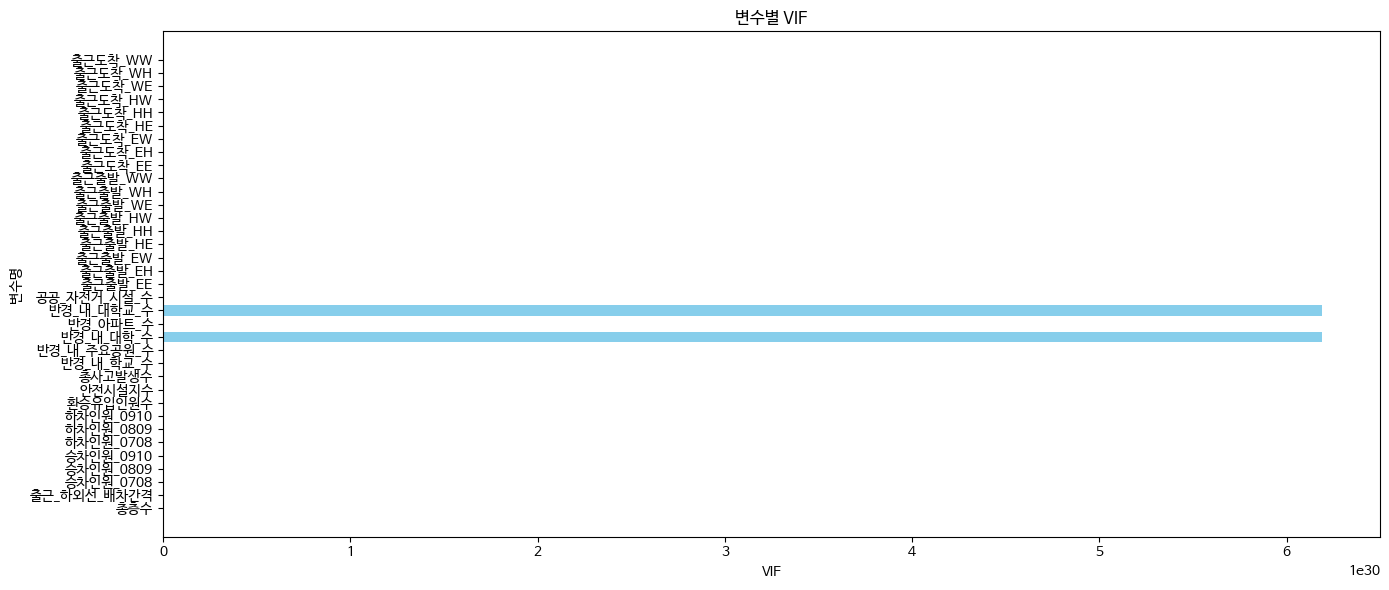

In [ ]:
# 변수명과 VIF 값 추출
variables = df_res['Variable']
vif_values = df_res['VIF']

# 막대 그래프로 변수별 VIF 시각화
plt.figure(figsize=(14, 6))
plt.barh(variables, vif_values, color='skyblue')
plt.xlabel('VIF')
plt.ylabel('변수명')
plt.title('변수별 VIF')
plt.tight_layout()
plt.show()

> 다중공선성 문제 해결을 위해 변수선택 필요

# 다중공선성이 있기에 변수선택을 진행 [후진 제거법]

In [ ]:
import statsmodels.api as sm

## 후진 소거법
variables = ['총층수', '출근_하외선_배차간격', '승차인원_0708', '승차인원_0809', '승차인원_0910',
       '하차인원_0708', '하차인원_0809', '하차인원_0910', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW']  # 설명 변수 리스트

y = df1['출근시간_혼잡도_평균']

selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df1[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df1[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['승차인원_0809',
 '승차인원_0910',
 '하차인원_0809',
 '하차인원_0910',
 '출근출발_EW',
 '출근출발_HE',
 '출근출발_HH',
 '출근출발_HW',
 '출근출발_WE',
 '출근도착_EE',
 '출근도착_HH',
 '출근도착_HW',
 '출근도착_WE',
 '출근도착_WW']

In [ ]:
selected_columns = ['승차인원_0809','출근시간_혼잡도_평균',
 '승차인원_0910',
 '하차인원_0809',
 '하차인원_0910',
 '출근출발_EW',
 '출근출발_HE',
 '출근출발_HH',
 '출근출발_HW',
 '출근출발_WE',
 '출근도착_EE',
 '출근도착_HH',
 '출근도착_HW',
 '출근도착_WE',
 '출근도착_WW']

df2 = df1[selected_columns]
df2

,승차인원_0809,출근시간_혼잡도_평균,승차인원_0910,하차인원_0809,하차인원_0910,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근도착_EE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WW
0,60473,86.085714,49096,293325,300163,9107,24991,2311,88696,5548,10609,3076,325838,5635,7809
1,107711,31.185714,77201,44236,37692,3188,31376,2316,122460,3358,5666,2205,88296,2151,2462
2,88230,45.100000,59238,59571,49529,5182,29428,2599,130241,1890,8496,2705,98437,3539,2936
3,34642,103.685714,28511,146658,134416,5763,29890,2654,95422,4083,7607,2009,186677,4045,4732
4,174194,55.957143,106382,234611,136484,4953,24096,1788,95008,3212,7243,2646,416612,3425,5980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,56691,20.957143,30165,14297,8090,4476,41350,1118,177399,3477,3635,1316,45777,1778,1527
227,13956,87.371429,12092,144360,95665,8591,14222,1325,44536,4729,17098,1431,417692,7768,8045
228,25902,68.942857,17208,17922,12770,3963,42997,2288,153883,3391,6531,2178,72852,2861,2697
229,68384,65.414286,37897,24644,19419,837,18891,1304,67804,828,1581,906,13528,552,572


# 최적모형 선택

수정결정계수, Mallows' Cp, AIC, BIC, PRESS 기준으로 판단

수정결정계수 -> 높을수록 좋은 모형

Mallows' Cp -> 값이 작을수록 & Cp값이 변수의 개수 p와 가까울수록 좋은 모형

AIC -> 작을수록 좋은 모형

BIC -> 작을수록 좋은 모형

PRESS -> 작을수록 좋은 예측력을 가진 모형

In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib
  matplotlib.rcParams['axes.unicode_minus'] = False

  from itertools import combinations
  from statsmodels.formula.api import ols

In [ ]:
df2.insert(0,'Intercept',[1]*len(df2)) ## 상수항 추가

In [ ]:
df2

In [ ]:
print(df2.columns)

Index(['Intercept', '승차인원_0809', '출근시간_혼잡도_평균', '승차인원_0910', '하차인원_0809',
       '하차인원_0910', '출근출발_EW', '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE',
       '출근도착_EE', '출근도착_HH', '출근도착_HW', '출근도착_WE', '출근도착_WW'],
      dtype='object')


In [ ]:
text_join2 = ' + '.join(df2.columns)
text_join2

'Intercept + 승차인원_0809 + 출근시간_혼잡도_평균 + 승차인원_0910 + 하차인원_0809 + 하차인원_0910 + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근도착_EE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WW'

In [ ]:
#모델 적합
fit = ols('출근시간_혼잡도_평균~승차인원_0809 + 승차인원_0910 + 하차인원_0809 + 하차인원_0910 + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근도착_EE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WW',data=df2).fit()

## hat matrix 계산
X = np.array(df2[['Intercept', '승차인원_0809', '승차인원_0910', '하차인원_0809',
       '하차인원_0910', '출근출발_EW', '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE',
       '출근도착_EE', '출근도착_HH', '출근도착_HW', '출근도착_WE', '출근도착_WW']]) ## Model matrix for full model

X_tX = np.matmul(X.transpose(),X)
X_tX_inv = np.linalg.inv(X_tX)
hat_matrix = np.matmul(np.matmul(X,X_tX_inv),X.transpose()) ## hat matrix
diagonals = np.array([hat_matrix[i][i] for i in range(len(df2))]) ## hat matrix의 대각원소

response = '출근시간_혼잡도_평균'
y = df2[response] ## 반응 변수 벡터
variables = ['승차인원_0809', '승차인원_0910', '하차인원_0809',
       '하차인원_0910', '출근출발_EW', '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE',
       '출근도착_EE', '출근도착_HH', '출근도착_HW', '출근도착_WE', '출근도착_WW'] ## 총 변수집합

num_var = len(variables) ## 총 변수 개수
num_data = len(df2) ## 데이터 개수
mse_full = fit.mse_resid ## 모든 변수를 포함한 mean square residual
mean_response = np.mean(y) ## y의 평균

cp_list = [] ## Mallow's C
ad_r_list = [] ## 수정된 결정계수
aic_list = [] ## Akaike's information criterion
bic_list = [] ## Bayes information criterion
press_list = [] ## press criterion

num_parameter = [] ## 파라미터 즉 절편을 포함한 회귀계수의 개수
subsets = [] ## 변수의 집합
for p in range(num_var+1):
    if p == 0: ## 절편만 있는 모형
        var_exp = '1'
        exp = response + ' ~ ' + var_exp
        subsets.append('None') ## 절편만 있고 변수는 없음
        sub_fit = ols(exp,data=df2).fit() ## 절편만 있는 모형 적합
        sse = np.sum(np.square(sub_fit.resid)) ## square sum of residual
        sst = np.sum(np.square(y-mean_response)) ## total sum of square
        cp = sse/mse_full - (num_data-2*(p+1)) ## Mallow's C
        ad_r = 0 ## 수정된 결정계수 절편만 있다면 수정된 결정계수 값은 0
        aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1) ## Akaike's information criterion
        bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1) ## Bayes information criterion
        press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals))) ## press
        cp_list.append(cp)
        ad_r_list.append(ad_r)
        aic_list.append(aic)
        bic_list.append(bic)
        press_list.append(press)
        num_parameter.append(p+1)
    else:
        selected_var = combinations(variables,p)
        for s in selected_var:
            var_exp = '+'.join(s)
            exp = response + ' ~ ' + var_exp
            subsets.append(', '.join(s))
            sub_fit = ols(exp,data=df2).fit()
            sse = np.sum(np.square(sub_fit.resid))
            sst = np.sum(np.square(y-np.mean(y)))
            cp = sse/mse_full - (num_data-2*(p+1))
            ad_r = 1 - ((num_data-1)/(num_data-p-1))*(sse/sst)
            aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1)
            bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1)
            press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals)))
            cp_list.append(cp)
            ad_r_list.append(ad_r)
            aic_list.append(aic)
            bic_list.append(bic)
            press_list.append(press)
            num_parameter.append(p+1)

df2_res = pd.DataFrame()
df2_res['Variables'] = subsets
df2_res['Number_of_parameter'] = num_parameter
df2_res['Ad_R'] = ad_r_list
df2_res['Cp'] = cp_list
df2_res['AIC'] = aic_list
df2_res['BIC'] = bic_list
df2_res['PRESS'] = press_list

In [ ]:
df2_res

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
0,None,1,0.000000,39.776355,989.022376,991.992189,194815.430434
1,승차인원_0809,2,0.032368,34.662517,985.273684,991.213310,186375.181274
2,승차인원_0910,2,0.040905,33.121683,983.997711,989.937338,184212.376903
3,하차인원_0809,2,-0.005478,41.494087,990.798594,996.738221,195668.023687
4,하차인원_0910,2,-0.006611,41.698525,990.960707,996.900334,194080.717782
...,...,...,...,...,...,...,...
16379,"승차인원_0809, 승차인원_0910, 하차인원_0809, 출근출발_EW, 출근출발...",14,0.151692,24.183945,977.608057,1019.185443,137975.978559
16380,"승차인원_0809, 승차인원_0910, 하차인원_0910, 출근출발_EW, 출근출발...",14,0.142220,25.749228,979.207039,1020.784425,139434.082997
16381,"승차인원_0809, 하차인원_0809, 하차인원_0910, 출근출발_EW, 출근출발...",14,0.165296,21.935944,975.280146,1016.857532,130218.193156
16382,"승차인원_0910, 하차인원_0809, 하차인원_0910, 출근출발_EW, 출근출발...",14,0.172662,20.718666,974.003712,1015.581098,129071.475055


In [ ]:
# Ad_R, Cp, AIC, BIC, PRESS 지표에 대한 최적모델
best_models = {
    'Ad_R': df2_res[df2_res['Ad_R'] == df2_res['Ad_R'].max()],
    'Cp': df2_res[df2_res['Cp'] == df2_res['Cp'].min()],
    'AIC': df2_res[df2_res['AIC'] == df2_res['AIC'].min()],
    'BIC': df2_res[df2_res['BIC'] == df2_res['BIC'].min()],
    'PRESS': df2_res[df2_res['PRESS'] == df2_res['PRESS'].min()]
}

best_models_df = pd.DataFrame()
for metric, best_model in best_models.items():
    best_models_df = best_models_df.append(best_model)

best_models_df

<ipython-input-27-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-27-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-27-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-27-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-27-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed fro

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
16383,"승차인원_0809, 승차인원_0910, 하차인원_0809, 하차인원_0910, 출근...",15,0.213319,15.00000,967.635458,1012.182657,123195.995857
16383,"승차인원_0809, 승차인원_0910, 하차인원_0809, 하차인원_0910, 출근...",15,0.213319,15.00000,967.635458,1012.182657,123195.995857
16383,"승차인원_0809, 승차인원_0910, 하차인원_0809, 하차인원_0910, 출근...",15,0.213319,15.00000,967.635458,1012.182657,123195.995857
9,출근출발_WE,2,0.048281,31.79023,982.885947,988.825574,163633.649938
16383,"승차인원_0809, 승차인원_0910, 하차인원_0809, 하차인원_0910, 출근...",15,0.213319,15.00000,967.635458,1012.182657,123195.995857


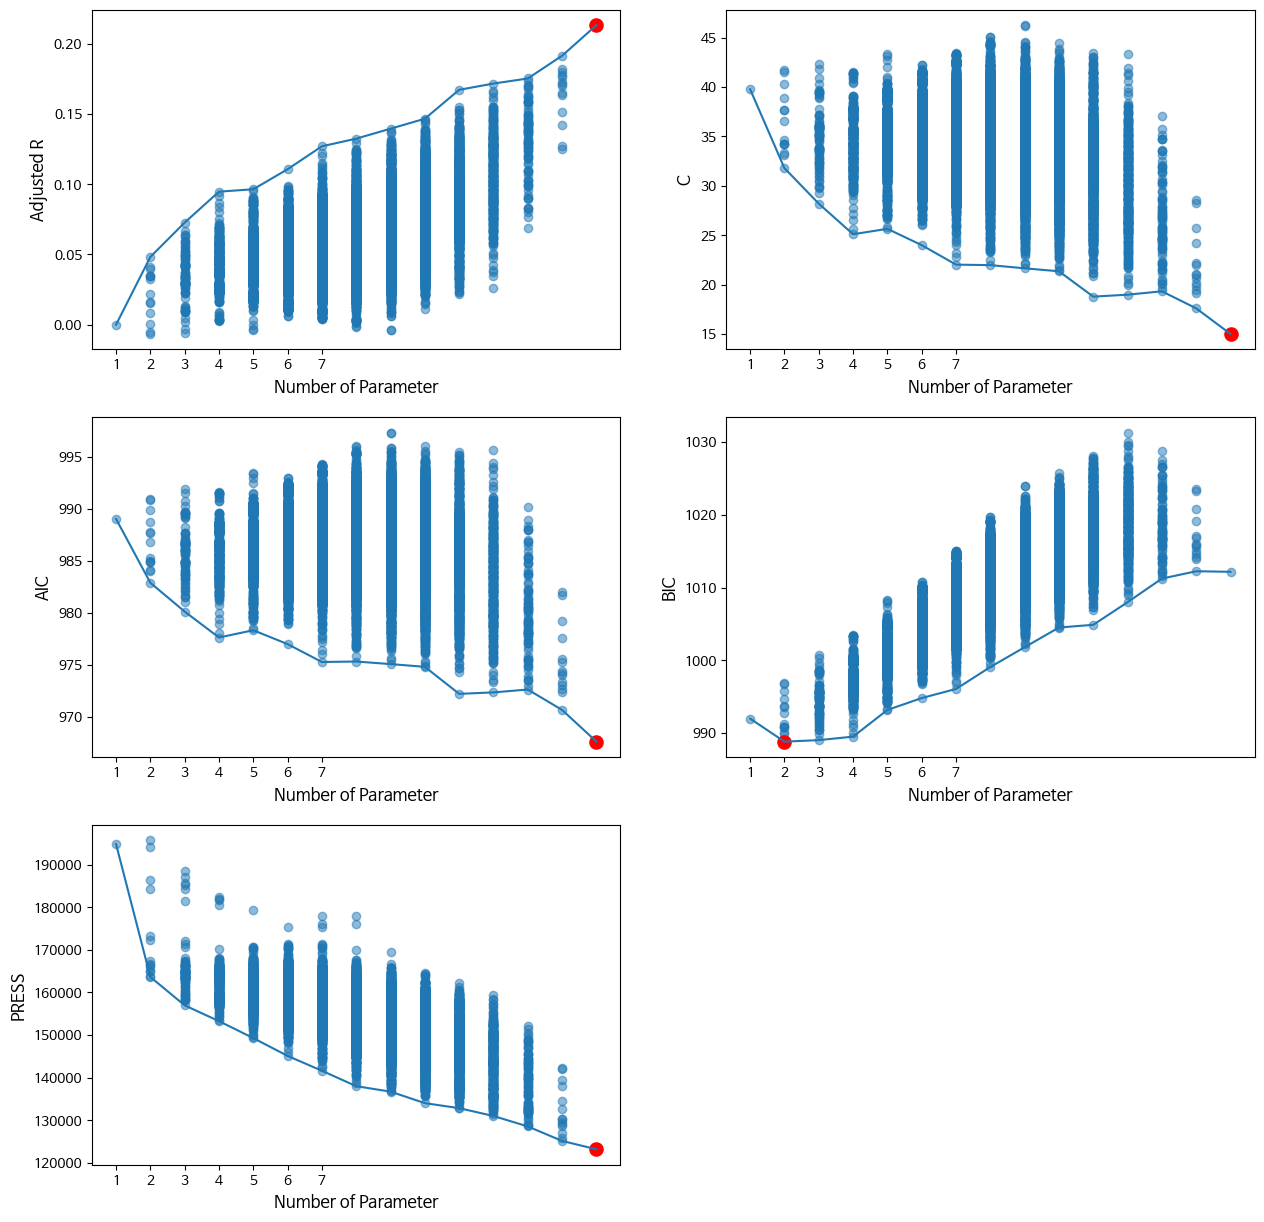

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
font_size = 12
columns = ['Ad_R', 'Cp', 'AIC', 'BIC', 'PRESS']
xlabel = 'Number of Parameter'
ylabels = ['Adjusted R','C','AIC','BIC','PRESS']

marker_style = dict(color='red',marker='o',markersize=10)

for i in range(len(ylabels)):
    ind = 320+i+1
    plt.subplot(ind)
    plt.scatter(df2_res['Number_of_parameter'],df2_res[columns[i]],alpha=0.5)
    plt.xlabel(xlabel,fontsize=font_size)
    plt.ylabel(ylabels[i],fontsize=font_size)
    if ylabels[i] == 'Adjusted R':
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].max()
        idx = temp_df2[columns[i]].idxmax()
        max_val = temp_df2[columns[i]].max()
        plt.scatter(temp_df2['Number_of_parameter'][idx], max_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    else:
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].min()
        idx = temp_df2[columns[i]].idxmin()
        min_val = temp_df2[columns[i]].min()
        plt.scatter(temp_df2['Number_of_parameter'][idx], min_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    plt.xticks(range(1,8))

plt.show()

In [ ]:
best_models_df[best_models_df['Number_of_parameter'] == 15]['Variables'].unique()

array(['승차인원_0809, 승차인원_0910, 하차인원_0809, 하차인원_0910, 출근출발_EW, 출근출발_HE, 출근출발_HH, 출근출발_HW, 출근출발_WE, 출근도착_EE, 출근도착_HH, 출근도착_HW, 출근도착_WE, 출근도착_WW'],
      dtype=object)

수정결정계수, Mallows' Cp, AIC, PRESS 는 파라미터가 15개인 모형을 선호

=> ['승차인원_0809, 승차인원_0910, 하차인원_0809, 하차인원_0910, 출근출발_EW, 출근출발_HE, 출근출발_HH, 출근출발_HW, 출근출발_WE, 출근도착_EE, 출근도착_HH, 출근도착_HW, 출근도착_WE, 출근도착_WW']에 상수항 추가된 버전

# 최종 모델적합

상수항 포함 케이스

In [ ]:
selected_columns =  ['승차인원_0809', '승차인원_0910', '하차인원_0809', '하차인원_0910', '출근출발_EW', '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근도착_EE', '출근도착_HH', '출근도착_HW', '출근도착_WE', '출근도착_WW','출근시간_혼잡도_평균']
df3 = df1[selected_columns]
df3

,승차인원_0809,승차인원_0910,하차인원_0809,하차인원_0910,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근도착_EE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WW,출근시간_혼잡도_평균
0,60473,49096,293325,300163,9107,24991,2311,88696,5548,10609,3076,325838,5635,7809,86.085714
1,107711,77201,44236,37692,3188,31376,2316,122460,3358,5666,2205,88296,2151,2462,31.185714
2,88230,59238,59571,49529,5182,29428,2599,130241,1890,8496,2705,98437,3539,2936,45.100000
3,34642,28511,146658,134416,5763,29890,2654,95422,4083,7607,2009,186677,4045,4732,103.685714
4,174194,106382,234611,136484,4953,24096,1788,95008,3212,7243,2646,416612,3425,5980,55.957143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,56691,30165,14297,8090,4476,41350,1118,177399,3477,3635,1316,45777,1778,1527,20.957143
227,13956,12092,144360,95665,8591,14222,1325,44536,4729,17098,1431,417692,7768,8045,87.371429
228,25902,17208,17922,12770,3963,42997,2288,153883,3391,6531,2178,72852,2861,2697,68.942857
229,68384,37897,24644,19419,837,18891,1304,67804,828,1581,906,13528,552,572,65.414286


In [ ]:
text_join3 = ' + '.join(df3.columns)
text_join3

'승차인원_0809 + 승차인원_0910 + 하차인원_0809 + 하차인원_0910 + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근도착_EE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WW + 출근시간_혼잡도_평균'

In [ ]:
model1 = sm.OLS.from_formula('출근시간_혼잡도_평균~승차인원_0809 + 승차인원_0910 + 하차인원_0809 + 하차인원_0910 + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근도착_EE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WW', data=df3) #상수항 포함모델
results1 = model1.fit()

# 계수 및 상수항 출력
coefficients1 = results1.params
intercept1 = results1.params['Intercept']  # 상수항

print("계수 (Coefficients):\n", coefficients1)
print("상수항 (Intercept):\n", intercept1)

계수 (Coefficients):
 Intercept    62.838080
승차인원_0809    -0.001220
승차인원_0910     0.002087
하차인원_0809    -0.000398
하차인원_0910     0.000489
출근출발_EW      -0.006299
출근출발_HE      -0.001859
출근출발_HH       0.025330
출근출발_HW       0.000628
출근출발_WE      -0.011763
출근도착_EE      -0.011239
출근도착_HH      -0.018682
출근도착_HW       0.000240
출근도착_WE       0.036514
출근도착_WW      -0.012963
dtype: float64
상수항 (Intercept):
 62.83807975508287


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     3.770
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           2.58e-05
Time:                        06:54:49   Log-Likelihood:                -673.14
No. Observations:                 144   AIC:                             1376.
Df Residuals:                     129   BIC:                             1421.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.8381      6.097     10.307      0.000      50.776      74.901
승차인원_0809     -0.0012      0.000     -2.778      0.006      -0.002      -0.000
승차인원_0910      0.0021      0.001      2.989      0.003       0.001       0.003
하차인원_0809     -0.0004      0.000     -3.571      0.001      -0.001      -0.000
하차인원_0910      0.0005      0.000      3.344      0.001       0.000       0.001
출근출발_EW       -0.0063      0.002     -2.675      0.008      -0.011      -0.002
출근출발_HE       -0.0019      0.001     -2.144      0.034      -0.004      -0.000
출근출발_HH        0.0253      0.009      2.849      0.005       0.008       0.043
출근출발_HW        0.0006      0.000      2.816      0.006       0.000       0.001
출근출발_WE       -0.0118      0.005     -2.544      0.012      -0.021      -0.003
출근도착_EE       -0.0112      0.003     -3.907      0.000      -0.017      -0.006
출근도착_HH       -0.0187      0.008     -2.485      0.014      -0.034      -0.004
출근도착_HW        0.0002   7.94e-05      3.028      0.003    8.33e-05       0.000
출근도착_WE        0.0365      0.009      3.945      0.000       0.018       0.055
출근도착_WW       -0.0130      0.005     -2.613      0.010      -0.023      -0.003
==============================================================================
Omnibus:                        4.460   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                3.532
Skew:                           0.268   Prob(JB):                        0.171
Kurtosis:                       2.452   Cond. No.                     7.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> 설명력 너무 낮고 다중공선성 심함

df3 내의 설명변수는 일단 다 유의한 것 같은데 변수선택을 한번 더...?

In [ ]:
text_join3 = ' + '.join(df3.columns)
text_join3

'승차인원_0809 + 승차인원_0910 + 하차인원_0809 + 하차인원_0910 + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근도착_EE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WW + 출근시간_혼잡도_평균'

In [ ]:
print(df3.columns)

Index(['승차인원_0809', '승차인원_0910', '하차인원_0809', '하차인원_0910', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근도착_EE', '출근도착_HH',
       '출근도착_HW', '출근도착_WE', '출근도착_WW', '출근시간_혼잡도_평균'],
      dtype='object')


In [ ]:
import statsmodels.api as sm

variables = ['승차인원_0809', '승차인원_0910', '하차인원_0809', '하차인원_0910', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근도착_EE', '출근도착_HH',
       '출근도착_HW', '출근도착_WE', '출근도착_WW']  # 설명 변수 리스트
y = df1['출근시간_혼잡도_평균']  # 반응 변수
selected_variables = []  # 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1
sv_per_step = []  # 각 스텝별로 선택된 변수들
adjusted_r_squared = []  # 각 스텝별 수정된 결정계수
steps = []  # 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)  # 변수의 p-value

    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합한다.
    for col in remainder:
        X = df1[selected_variables + [col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter:  # 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())

        # 선택된 변수들에 대해서 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df1[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y, selected_X).fit().pvalues[1:]  # 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()

            if max_pval >= sl_remove:  # 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y, sm.add_constant(df1[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-43-ebe9e8582962>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-43-ebe9e8582962>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-43-ebe9e8582962>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-43-ebe9e8582962>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value


In [ ]:
selected_variables

['출근출발_WE', '승차인원_0910', '승차인원_0809']

In [ ]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)

sdf = df1.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['출근출발_WE', '승차인원_0910', '승차인원_0809']]
corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬

## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다.
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('출근시간_혼잡도_평균 ~ 출근출발_WE+승차인원_0910+승차인원_0809',data=sdf).fit()

variables = [] ## 변수 이름
reg_coef = [] ## 해당 변수의 회귀 계수
vif = [] ## 해당 변수의 분산팽창인자
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])

df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     5.818
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           0.000892
Time:                        07:05:43   Log-Likelihood:                 161.96
No. Observations:                 144   AIC:                            -315.9
Df Residuals:                     140   BIC:                            -304.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.107e-18      0.007   1.37e-15      1.000      -0.013       0.013
출근출발_WE       -0.2504      0.085     -2.936      0.004      -0.419      -0.082
승차인원_0910      1.0700      0.455      2.352      0.020       0.170       1.970
승차인원_0809     -0.9165      0.460     -1.991      0.048      -1.827      -0.006
==============================================================================
Omnibus:                       10.403   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.957
Skew:                           0.399   Prob(JB):                       0.0309
Kurtosis:                       2.277   Cond. No.                         97.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_res

,Variable,Estimate,VIF
0,출근출발_WE,-0.250370,1.145229
1,승차인원_0910,1.069981,32.594952
2,승차인원_0809,-0.916464,33.376754


=> 하...노답

상수항 없는 버전

In [ ]:
model2 = sm.OLS.from_formula('출근시간_혼잡도_평균~승차인원_0809 + 승차인원_0910 + 하차인원_0809 + 하차인원_0910 + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근도착_EE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WW- 1', data=df3)  #상수항 포함하지 않은 모델
results2 = model2.fit()

# 계수 및 상수항 출력
coefficients2 = results2.params

print("계수 (Coefficients):\n", coefficients2)

계수 (Coefficients):
 승차인원_0809   -0.000368
승차인원_0910    0.001233
하차인원_0809   -0.000055
하차인원_0910    0.000281
출근출발_EW     -0.005574
출근출발_HE     -0.000970
출근출발_HH      0.023813
출근출발_HW      0.000402
출근출발_WE     -0.011678
출근도착_EE     -0.012462
출근도착_HH     -0.010682
출근도착_HW      0.000040
출근도착_WE      0.048898
출근도착_WW     -0.010467
dtype: float64


In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.652
Method:                 Least Squares   F-statistic:                              20.27
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    3.19e-26
Time:                        06:56:41   Log-Likelihood:                         -716.40
No. Observations:                 144   AIC:                                      1461.
Df Residuals:                     130   BIC:                                      1502.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
승차인원_0809     -0.0004      0.001     -0.635      0.527      -0.002       0.001
승차인원_0910      0.0012      0.001      1.322      0.188      -0.001       0.003
하차인원_0809  -5.462e-05      0.000     -0.381      0.704      -0.000       0.000
하차인원_0910      0.0003      0.000      1.443      0.151      -0.000       0.001
출근출발_EW       -0.0056      0.003     -1.760      0.081      -0.012       0.001
출근출발_HE       -0.0010      0.001     -0.836      0.405      -0.003       0.001
출근출발_HH        0.0238      0.012      1.991      0.049       0.000       0.047
출근출발_HW        0.0004      0.000      1.345      0.181      -0.000       0.001
출근출발_WE       -0.0117      0.006     -1.878      0.063      -0.024       0.001
출근도착_EE       -0.0125      0.004     -3.223      0.002      -0.020      -0.005
출근도착_HH       -0.0107      0.010     -1.062      0.290      -0.031       0.009
출근도착_HW     4.045e-05      0.000      0.391      0.697      -0.000       0.000
출근도착_WE        0.0489      0.012      3.961      0.000       0.024       0.073
출근도착_WW       -0.0105      0.007     -1.570      0.119      -0.024       0.003
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.764
Skew:                          -0.195   Prob(JB):                        0.152
Kurtosis:                       3.689   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

출근도착_EE,출근도착_WE	0.0489만 유의하다고나옴

In [ ]:
model3 = sm.OLS.from_formula('출근시간_혼잡도_평균~출근도착_EE+출근도착_WE - 1', data=df3)  #상수항 포함하지 않은 모델
results3 = model3.fit()

# 계수 및 상수항 출력
coefficients3 = results3.params

print("계수 (Coefficients):\n", coefficients3)

계수 (Coefficients):
 출근도착_EE    0.002151
출근도착_WE    0.004363
dtype: float64


In [ ]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared (uncentered):                   0.390
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              45.40
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    5.71e-16
Time:                        07:00:51   Log-Likelihood:                         -764.18
No. Observations:                 144   AIC:                                      1532.
Df Residuals:                     142   BIC:                                      1538.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
출근도착_EE        0.0022      0.004      0.603      0.548      -0.005       0.009
출근도착_WE        0.0044      0.007      0.583      0.561      -0.010       0.019
==============================================================================
Omnibus:                        4.303   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.557
Skew:                          -0.207   Prob(JB):                        0.102
Kurtosis:                       3.767   Cond. No.                         20.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 변수선택을 더 빡세게 해보기

유의수준 0.05로

In [ ]:
import statsmodels.api as sm

## 후진 소거법
variables = ['총층수', '출근_하외선_배차간격', '승차인원_0708', '승차인원_0809', '승차인원_0910',
       '하차인원_0708', '하차인원_0809', '하차인원_0910', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW']  # 설명 변수 리스트

y = df1['출근시간_혼잡도_평균']

selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df1[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df1[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['승차인원_0809',
 '승차인원_0910',
 '하차인원_0809',
 '하차인원_0910',
 '출근출발_EW',
 '출근출발_HE',
 '출근출발_HH',
 '출근출발_HW',
 '출근출발_WE',
 '출근도착_EE',
 '출근도착_HH',
 '출근도착_HW',
 '출근도착_WE',
 '출근도착_WW']

=> 여전히 14개네 세상에

=> 괜찮은 결과가 없음...

In [ ]:
df1

,총층수,출근_하외선_배차간격,승차인원_0708,승차인원_0809,승차인원_0910,하차인원_0708,하차인원_0809,하차인원_0910,환승유입인원수,안전시설지수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학_수,반경_아파트_수,반경_내_대학교_수,공공_자전거_시설_수,출근시간_혼잡도_평균,출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW
0,3,4.253968,36176,60473,49096,138873,293325,300163,831737,3,5,5,0,1,6,1,4,86.085714,10361,4710,9107,24991,2311,88696,5548,4832,7179,10609,3252,10650,56430,3076,325838,5635,1869,7809
1,2,4.336134,73477,107711,77201,24293,44236,37692,315530,3,2,9,0,0,7,0,5,31.185714,5982,2482,3188,31376,2316,122460,3358,1803,3298,5666,4870,3286,26163,2205,88296,2151,2753,2462
2,5,4.387500,49601,88230,59238,24521,59571,49529,374321,3,10,11,1,2,2,2,6,45.100000,7219,5918,5182,29428,2599,130241,1890,3677,2820,8496,4361,3405,52120,2705,98437,3539,2361,2936
3,3,4.239837,24068,34642,28511,52910,146658,134416,367316,2,8,6,0,2,4,2,2,103.685714,7436,3619,5763,29890,2654,95422,4083,3046,5008,7607,3959,6571,38890,2009,186677,4045,1936,4732
4,3,4.296748,127585,174194,106382,79227,234611,136484,731249,3,7,10,1,0,8,0,6,55.957143,6598,3424,4953,24096,1788,95008,3212,2718,2629,7243,3245,10008,42617,2646,416612,3425,1962,5980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2,4.942029,49584,56691,30165,8510,14297,8090,147598,3,2,8,2,1,5,1,5,20.957143,5395,2215,4476,41350,1118,177399,3477,1681,3573,3635,3364,2572,18426,1316,45777,1778,3482,1527
227,4,4.631579,10121,13956,12092,56021,144360,95665,244815,2,2,8,2,0,10,0,6,87.371429,9342,4789,8591,14222,1325,44536,4729,4209,5446,17098,2616,13111,81903,1431,417692,7768,1178,8045
228,4,4.592105,21160,25902,17208,7942,17922,12770,95405,3,0,8,1,2,11,2,7,68.942857,7266,5213,3963,42997,2288,153883,3391,2755,3132,6531,4978,3013,36556,2178,72852,2861,4220,2697
229,3,4.592105,65969,68384,37897,14751,24644,19419,246439,3,4,20,1,2,10,2,7,65.414286,2298,1434,837,18891,1304,67804,828,766,1110,1581,2225,602,7177,906,13528,552,1456,572


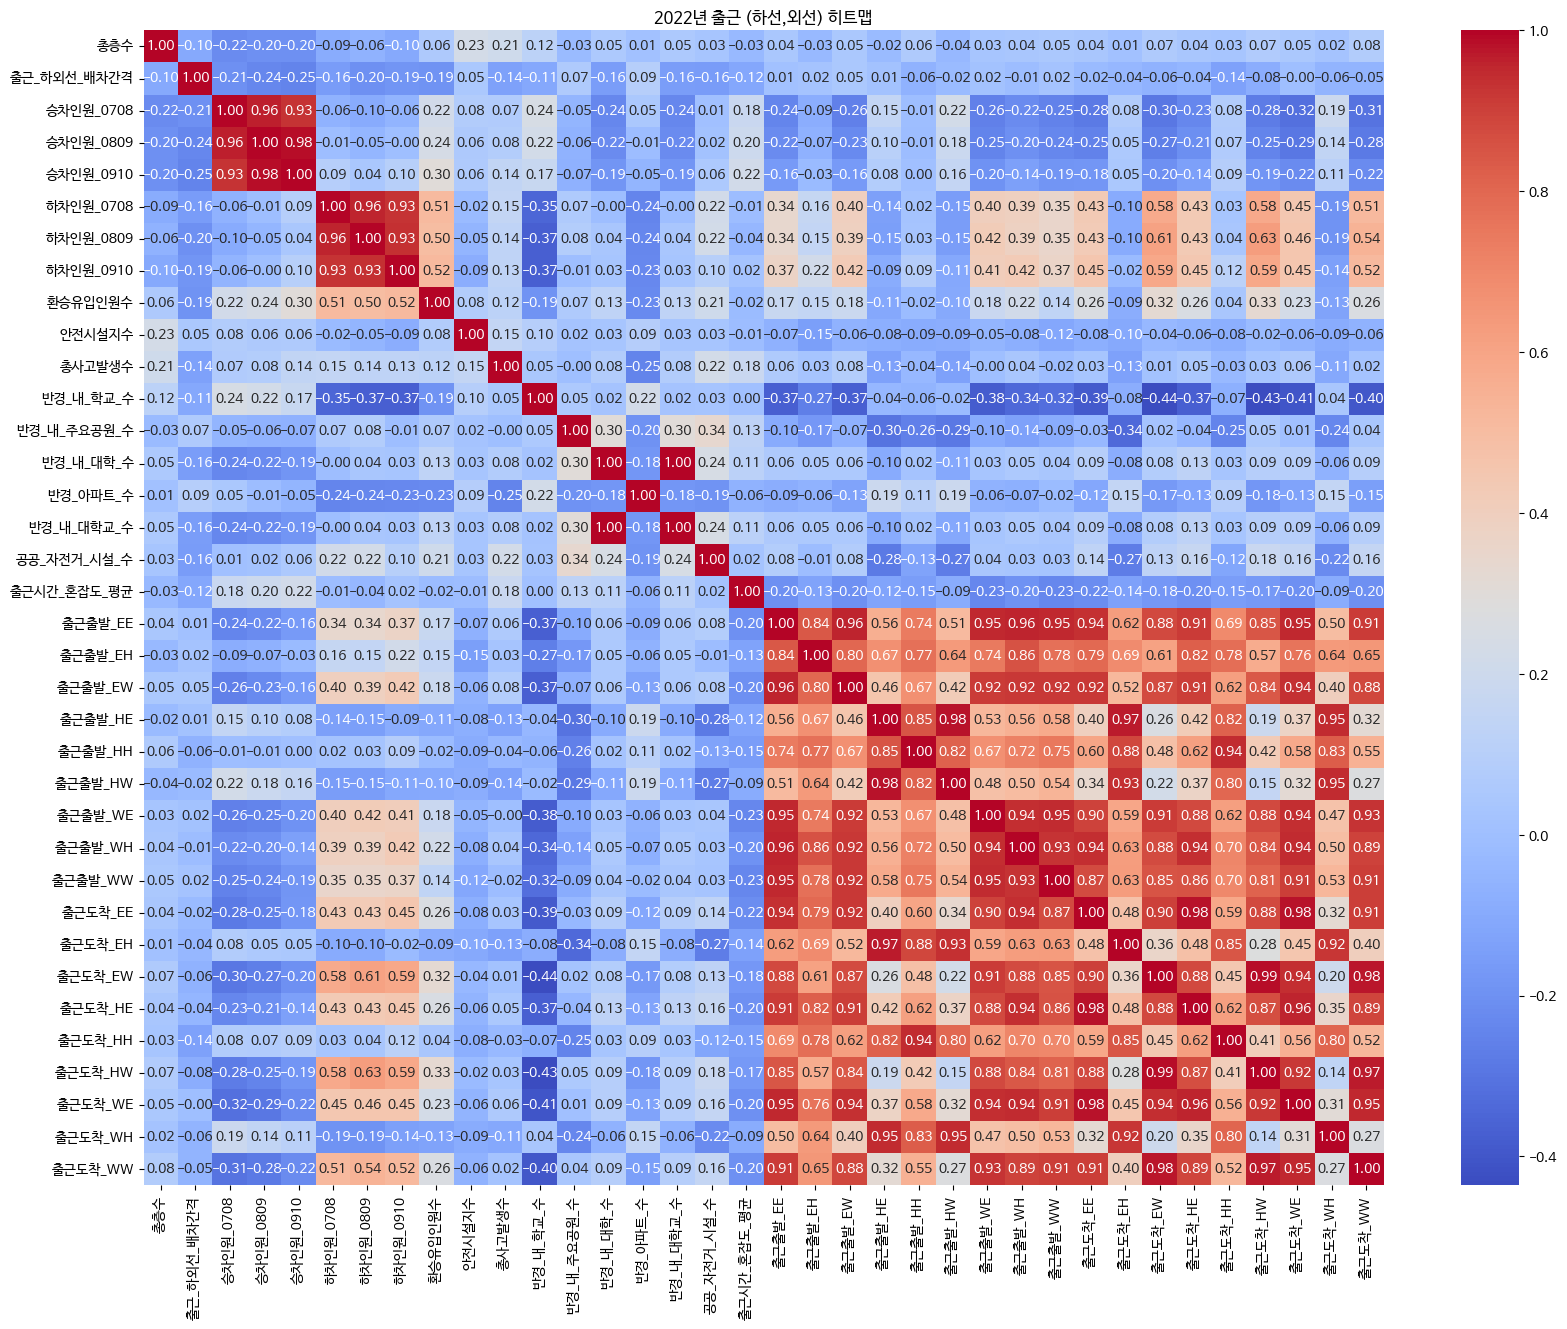

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df1.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("2022년 출근 (하선,외선) 히트맵")
plt.show()

다중공선성 문제..설명변수간 상관계수가 높은 편ㅠㅠㅠㅠ